<a href="https://colab.research.google.com/github/mana9512/bank-term-deposit-prediction/blob/main/AutoML_Bank_Term_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AUTOML**

Name: Manashree Patel <br>
NUID: 002770365

# **Dataset Used :** *Bank Term Deposit Predictions*

***link :*** [https://www.kaggle.com/datasets/thedevastator/bank-term-deposit-predictions?rvi=1](https://www.kaggle.com/datasets/thedevastator/bank-term-deposit-predictions?rvi=1)

---

# **About Dataset :**

This dataset, titled Direct Marketing Campaigns for Bank Term Deposits, is a collection of data related to the direct marketing campaigns conducted by a Portuguese banking institution. These campaigns primarily involved phone calls with customers, and the objective was to determine whether or not a customer would subscribe to a term deposit offered by the bank.


---

# **Features :**

The dataset contains various features that provide insights into customer attributes and campaign outcomes. These features include:

**Age**: The age of the customer.

**Job**: The occupation of the customer.

**Marital Status**: The marital status of the customer.

**Education**: The education level of the customer.

**Default**: Whether or not the customer has credit in default.

**Balance**: The balance of the customer's account.

**Housing Loan**: Whether or not the customer has a housing loan.

**Contact Communication Type**: The method used to contact the customer (e.g., telephone, cellular).

**Day**: The day of the month when the last contact with the customers was made.

**Duration**: The duration (in seconds) of the last contact with customers during a campaign.

**Campaign Contacts Count**: Number of contacts performed during this campaign for each customer.

**pdays** : number days passed since previously contacted form previous camapign

**poutcome** : outcome from previous marketing campaign

The purpose behind this dataset is to train a predictive model that can determine if a given customer will subscribe to a term deposit based on these various features.

# Importing the libraries

In [1]:
#installing dependencies
!pip install eli5
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=d32d6b4b762b1ce77a9fd3725c212ad71f9846228e94d2f70177a8e42c17169d
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=2986342e974c8b74416f67ca0c7e836253a6d6d152c2bac1fb034d5403edd4c8
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [2]:
#importing the library
import h2o
from h2o.automl import H2OAutoML
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

#initializing the h2o library
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpmp_h79kx
  JVM stdout: /tmp/tmpmp_h79kx/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpmp_h79kx/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_n35ruu
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


# Importing Data

In [3]:
train_data = h2o.import_file('https://raw.githubusercontent.com/mana9512/bank-term-deposit-prediction/main/train.csv')
train_data.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
train_data.describe()

Rows:45211
Cols:17

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
type,int,enum,enum,enum,enum,int,enum,enum,enum,int,enum,int,int,int,int,enum,enum
mins,18.0,,,,,-8019.0,,,,1.0,,0.0,1.0,-1.0,0.0,,
mean,40.93621021432835,,,,,1362.2720576850777,,,,15.80641879188693,,258.1630797814688,2.7638406582468886,40.197827962221574,0.580323372630554,,
maxs,95.0,,,,,102127.0,,,,31.0,,4918.0,63.0,871.0,275.0,,
sigma,10.61876204097542,,,,,3044.765829168518,,,,8.322476153044589,,257.52781226517203,3.09802088327917,100.12874599059838,2.303441044931219,,
zeros,0,,,,,3514,,,,0,,3,0,0,36954,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no


In [5]:
test_data = h2o.import_file('https://raw.githubusercontent.com/mana9512/bank-term-deposit-prediction/main/test.csv')
test_data.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [6]:
#extract independent variables
X_train =  train_data.drop('y', axis=1)
#extract target variable
y_train = train_data['y']


X_test =  test_data.drop('y', axis=1)
#extract target variable
y_test = test_data['y']

# **Auto ML**

AutoML (Automated Machine Learning) is a process of automating the entire process of building machine learning models, from data pre-processing to model selection and tuning, with little or no human intervention. It is designed to simplify and accelerate the development of machine learning models by automating repetitive tasks and reducing the need for manual intervention.

H2OAutoML is used to set the hyperparameters which is then used for training the
data

*   <b>max_models = 20:</b> The value of 20 means that the process will build up to 20 different models and select the best one based on a predefined metric.
*   <b>seed = 0:</b> This parameter sets a fixed random seed to ensure that the results of the training process are reproducible. 0 is a random number, you can also select 1234
*   <b>verbosity = "debug", "info", "warn"</b> are the three options default is None
"debug": It prints maximum debug based information.
*   <b>nfolds = 0:</b> This parameter specifies the number of folds to use in cross-validation. A value of 0 means that no cross-validation will be performed and the model will be trained on the entire dataset. Setting cross validation to zero may lead to overfitting but as later I have tested the accuracy of test data is good. Adding cross validation leads to more training time and would consume more power


In [7]:
# Run AutoML for 20 base models
aml = H2OAutoML(max_models=20,seed=0,verbosity="debug",nfolds=0)
aml.train(x=X_train.columns, y=y_train.columns[0], training_frame=train_data)

AutoML progress: |
20:12:52.611: Project: AutoML_1_20240219_201252
20:12:52.612: Cross-validation disabled by user: no fold column nor nfolds > 1.
20:12:52.612: Setting stopping tolerance adaptively based on the training frame: 0.004703032105125448
20:12:52.612: Build control seed: 0
20:12:52.624: Since cross-validation is disabled, and validation frame(s) were not provided, automatically split the training data into training, validation frame(s) in the ratio 90/10/0.
20:12:53.454: training frame: Frame key: AutoML_1_20240219_201252_training_train.hex    cols: 17    rows: 40751  chunks: 8    size: 664115  checksum: 292565437654488
20:12:53.480: validation frame: Frame key: AutoML_1_20240219_201252_validation_train.hex    cols: 17    rows: 4460  chunks: 8    size: 122938  checksum: -74931065707464
20:12:53.480: leaderboard frame: Frame key: AutoML_1_20240219_201252_validation_train.hex    cols: 17    rows: 4460  chunks: 8    size: 122938  checksum: -74931065707464
20:12:53.480: blending

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20240219_201252_model_2


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    100                100                         84263                  9            9            9             19            116           62.1

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.045889597295384124
RMSE: 0.2142185736470676
LogLoss: 0.15149763086203188
Mean Per-Class Error: 0.12919973421845765
AUC: 0.9655416595617643
AUCPR: 0.8020549427037642
Gini: 0.9310833191235286

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3549120928072559
       no     yes    Error    Rate
-----  -----  -----  -------  ----------------
no     34227  1775   0.0493   (1775.0/36002.0)
yes    993    3756   0.2091   (993.0/4749.0)
Total  35220  5531   0.0679   (2768.0/40751.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.354912     0.730739  204
max f2                       0.196664     0.798927  262
max f0point5                 0.542809     0.75061   137
max accuracy                 0.469296     0.936934  164
max precision                0.967887     1         0
max recall                   0.00346711   1         392
max specificity              0.967887     1         0
max absolute_mcc             0.348505     0.694928  206
max min_per_class_accuracy   0.184807     0.900506  267
max mean_per_class_accuracy  0.139927     0.904164  287
max tns                      0.967887     36002     0
max fns                      0.967887     4746      0
max fps                      0.00092925   36002     399
max tps                      0.00346711   4749      392
max tnr                      0.967887     1         0
max fnr                      0.967887     0.999368  0
max fpr                      0.00092925   1         399
max tpr                      0.00346711   1         392

Gains/Lift Table: Avg response rate: 11.65 %, avg score: 11.66 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.010012                    0.862755           8.45477     8.45477            0.985294         0.9017      0.985294                    0.9017              0.0846494       0.0846494                  745.477   745.477            0.0844827
2        0.020024                    0.806513           8.05517     8.25497            0.938725         0.833675    0.96201                     0.867687            0.0806486       0.165298                   705.517   725.497            0.164437
3        0.0300115                   0.762427           7.88521     8.13192            0.918919         0.783234    0.94767                     0.839582            0.0787534       0.244051                   688.521   713.192            0.242274
4        0.0400236                   0.720425           7.08771     7.87071            0.82598          0.742045    0.917229                    0.815183            0.0709623       0.315014                   608.771   687.071            0.311264
5        0.050011                    0.67594            6.78887     7.65466            0.791155       

In [8]:
# view the leader
lb = aml.leaderboard
best_model = aml.leader
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_grid_1_AutoML_1_20240219_201252_model_2,0.937101,0.198247,0.632682,0.171981,0.252,0.0635042
GBM_2_AutoML_1_20240219_201252,0.936039,0.202056,0.6321,0.147506,0.253038,0.0640284
GBM_3_AutoML_1_20240219_201252,0.935851,0.202271,0.631464,0.164602,0.253053,0.0640358
GBM_1_AutoML_1_20240219_201252,0.935157,0.200617,0.629708,0.173479,0.252949,0.0639829
XGBoost_grid_1_AutoML_1_20240219_201252_model_3,0.935062,0.200599,0.633922,0.165495,0.252834,0.063925
GBM_4_AutoML_1_20240219_201252,0.93377,0.206128,0.614662,0.163766,0.255909,0.0654892
GBM_grid_1_AutoML_1_20240219_201252_model_1,0.933227,0.205892,0.622946,0.159708,0.255403,0.0652305
XGBoost_3_AutoML_1_20240219_201252,0.933203,0.203358,0.631623,0.165523,0.253919,0.0644749
XGBoost_grid_1_AutoML_1_20240219_201252_model_1,0.932527,0.204343,0.618508,0.143004,0.255187,0.0651204
GBM_5_AutoML_1_20240219_201252,0.932116,0.205173,0.632584,0.152556,0.253853,0.0644414


<b>Lets Understand the parameter</b>
*   AUC: The binary classification models are tested using the AUC (Area Under the Receiver Operating Characteristic Curve) statistic. Its range is 0.5 to 1.0, with 0.5 denoting a random guess and 1.0 denoting accurate categorization.
*   Logloss (Logarithmic Loss): This metric is used to evaluate a classification model's probabilistic predictions. It goes from 0 to infinity and represents the difference between the predicted probabilities and the actual target values; a smaller number denotes greater performance.
*   AUCPR: This metric, known as the AUC (Area Under the Precision-Recall Curve), is frequently used to assess binary classification algorithms, particularly when the positive class is uncommon. It runs from 0 to 1, with a value of 1 denoting excellent classification.
*   Mean Per Class Error: This metric is employed to evaluate models for multi-class categorization. It runs from 0 to 1, and a lower value denotes greater performance. It assesses the average mistake rate for each class.
*   RMSE (Root Mean Squared Error): This metric is used to evaluate regression models.It ranges from 0 to infinity and represents the discrepancy between the expected and actual goal values; a smaller number denotes greater performance.
*   MSE (Mean Squared Error): This metric is used to evaluate regression models.
It spans from 0 to infinity and represents the discrepancy between the expected and actual goal values; a smaller number denotes greater performance.

In [9]:
print(best_model)

Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20240219_201252_model_2


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    100                100                         84263                  9            9            9             19            116           62.1

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.045889597295384124
RMSE: 0.2142185736470676
LogLoss: 0.15149763086203188
Mean Per-Class Error: 0.12919973421845765
AUC: 0.9655416595617643
AUCPR: 0.8020549427037642
Gini: 0.9310833191235286

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3549120928072559
       no     yes    Error    Rate
-----  -----  -----  -------  ------

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
DRF_1_AutoML_1_20240219_201252,0.993729,0.085879,0.967639,0.0459362,0.142972,0.0204409,10661,0.032852,DRF
XRT_1_AutoML_1_20240219_201252,0.988521,0.139298,0.941411,0.0791867,0.182199,0.0331966,10707,0.035544,DRF
GBM_4_AutoML_1_20240219_201252,0.980407,0.11991,0.898861,0.0978764,0.180187,0.0324672,5512,0.03681,GBM
GBM_3_AutoML_1_20240219_201252,0.967021,0.14655,0.836922,0.126526,0.206133,0.042491,4724,0.030674,GBM
GBM_1_AutoML_1_20240219_201252,0.966246,0.152839,0.781155,0.1443,0.214992,0.0462217,17927,0.052776,GBM
XGBoost_2_AutoML_1_20240219_201252,0.965789,0.146663,0.8038,0.130703,0.208365,0.0434162,4646,0.012717,XGBoost
XGBoost_grid_1_AutoML_1_20240219_201252_model_1,0.963755,0.152146,0.783083,0.147389,0.214848,0.0461599,3236,0.019766,XGBoost
XGBoost_1_AutoML_1_20240219_201252,0.960372,0.1571,0.768184,0.118667,0.218409,0.0477024,10538,0.012243,XGBoost
GBM_grid_1_AutoML_1_20240219_201252_model_2,0.958571,0.161098,0.767767,0.132022,0.220828,0.048765,9108,0.044142,GBM
GBM_2_AutoML_1_20240219_201252,0.958125,0.16097,0.790431,0.152853,0.217725,0.0474043,6478,0.029861,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_grid_1_AutoML_1_20240219_201252_model_2

,no,yes,Error,Rate
no,3773.0,227.0,0.0568,(227.0/4000.0)
yes,108.0,413.0,0.2073,(108.0/521.0)
Total,3881.0,640.0,0.0741,(335.0/4521.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

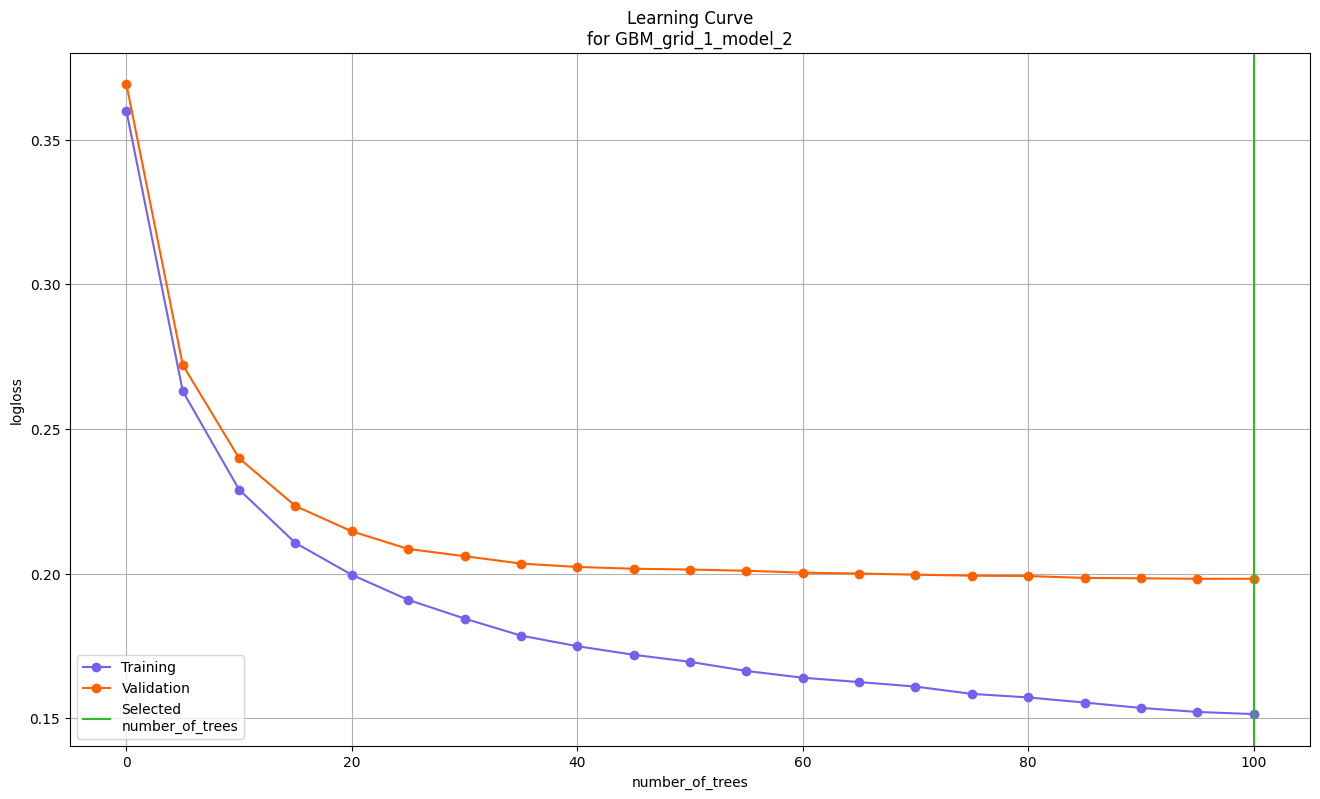

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

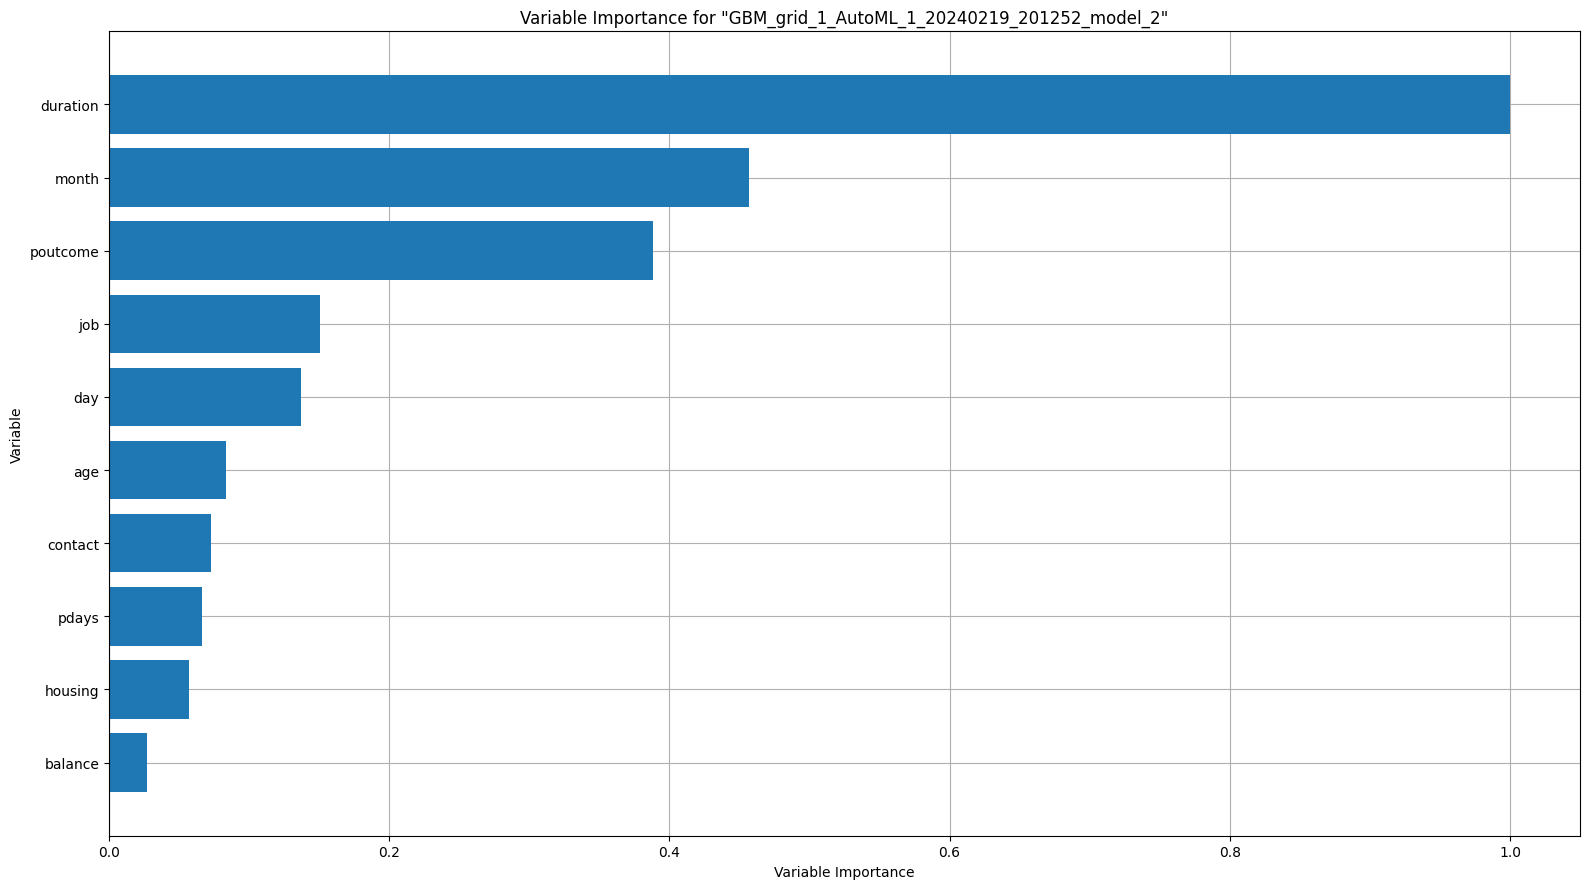

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

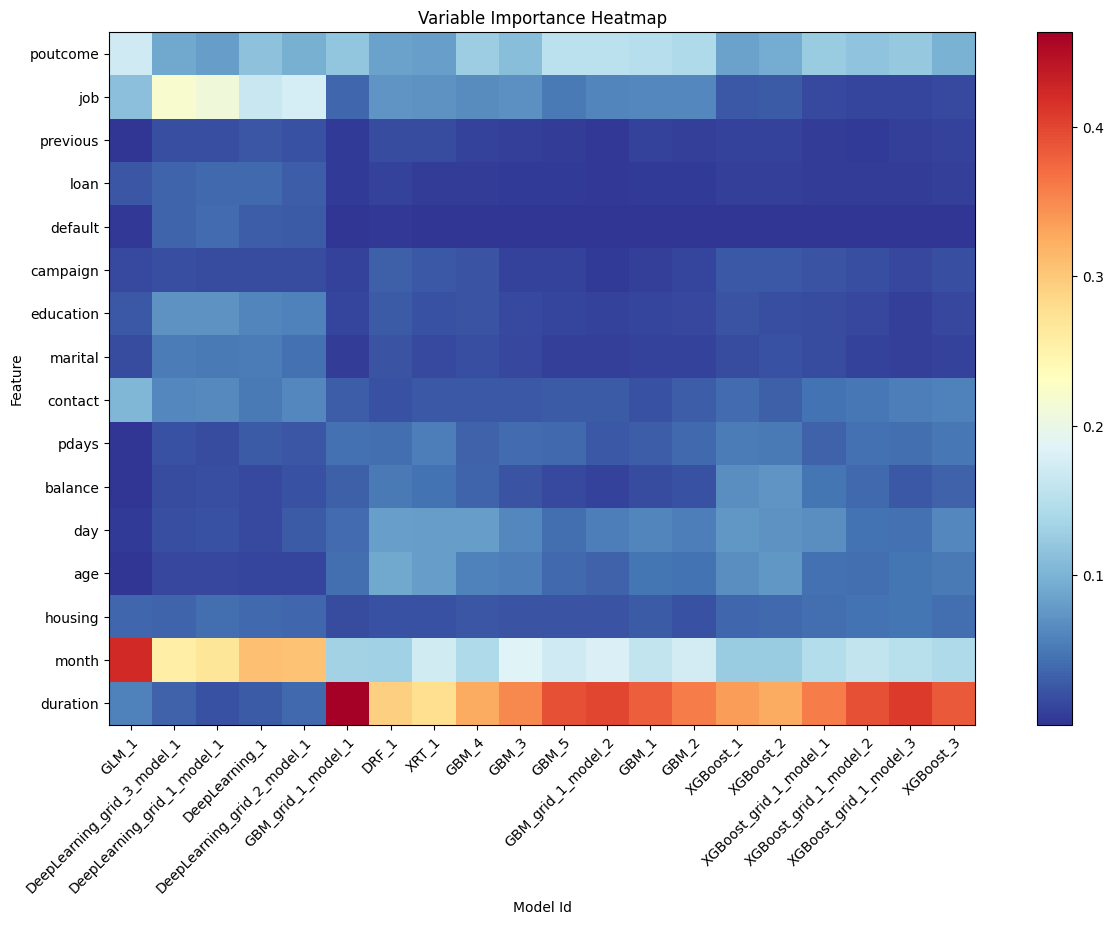

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

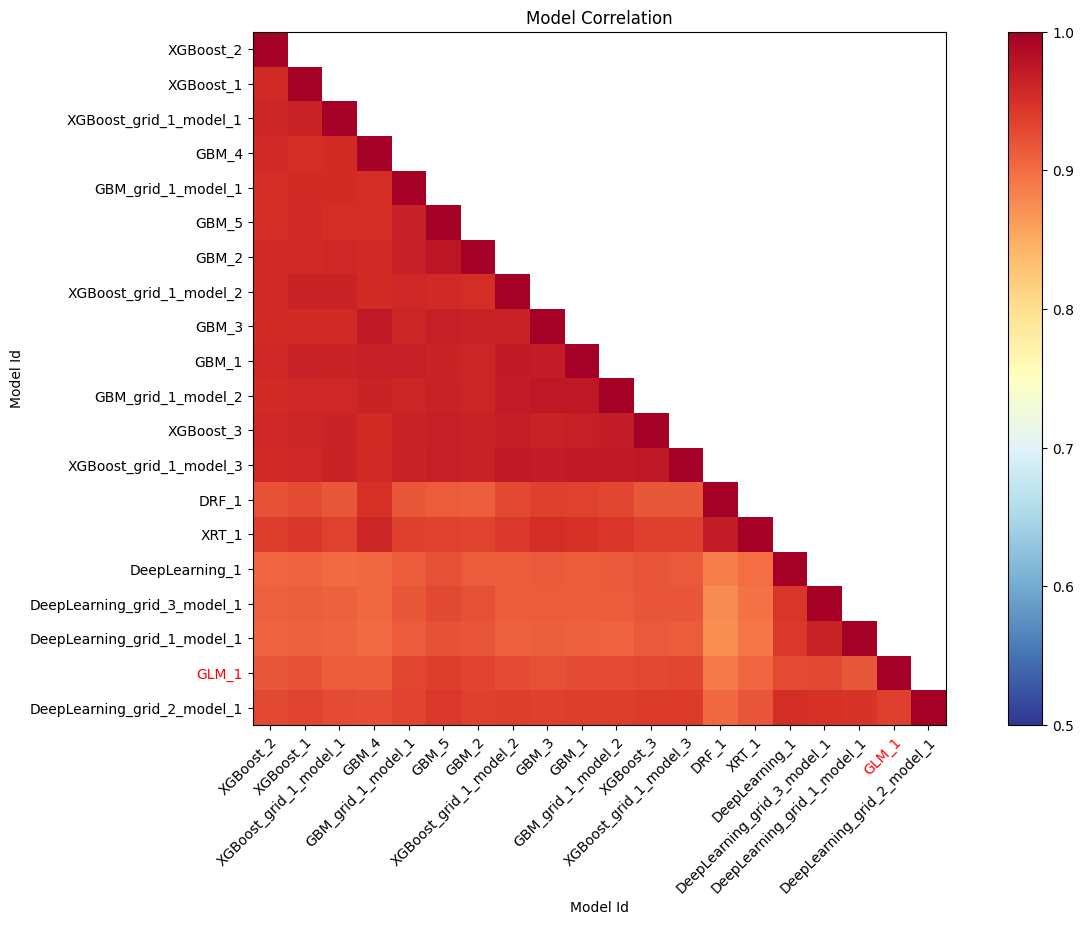

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

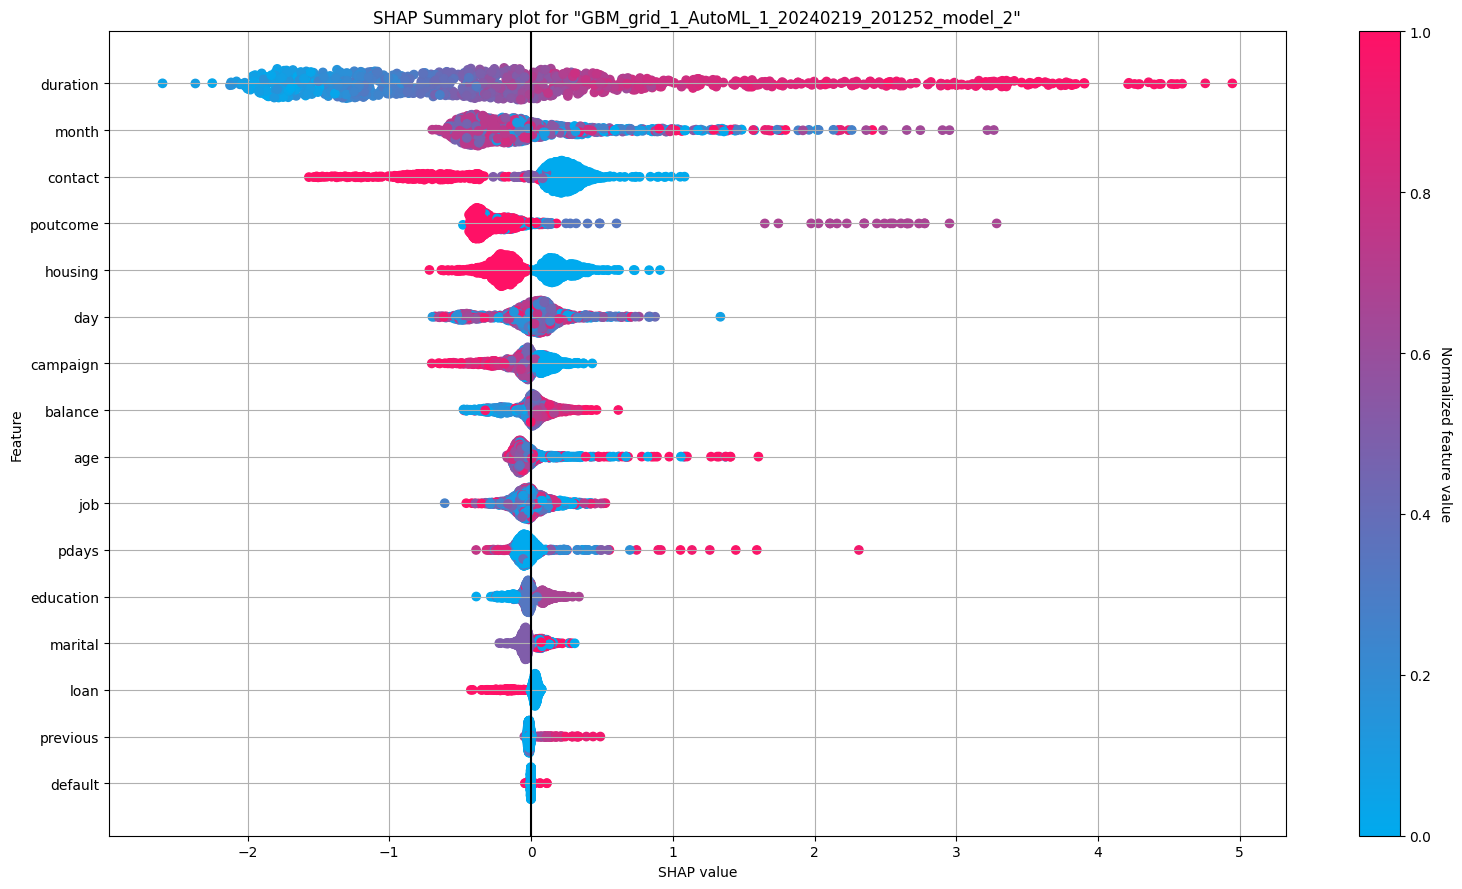

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

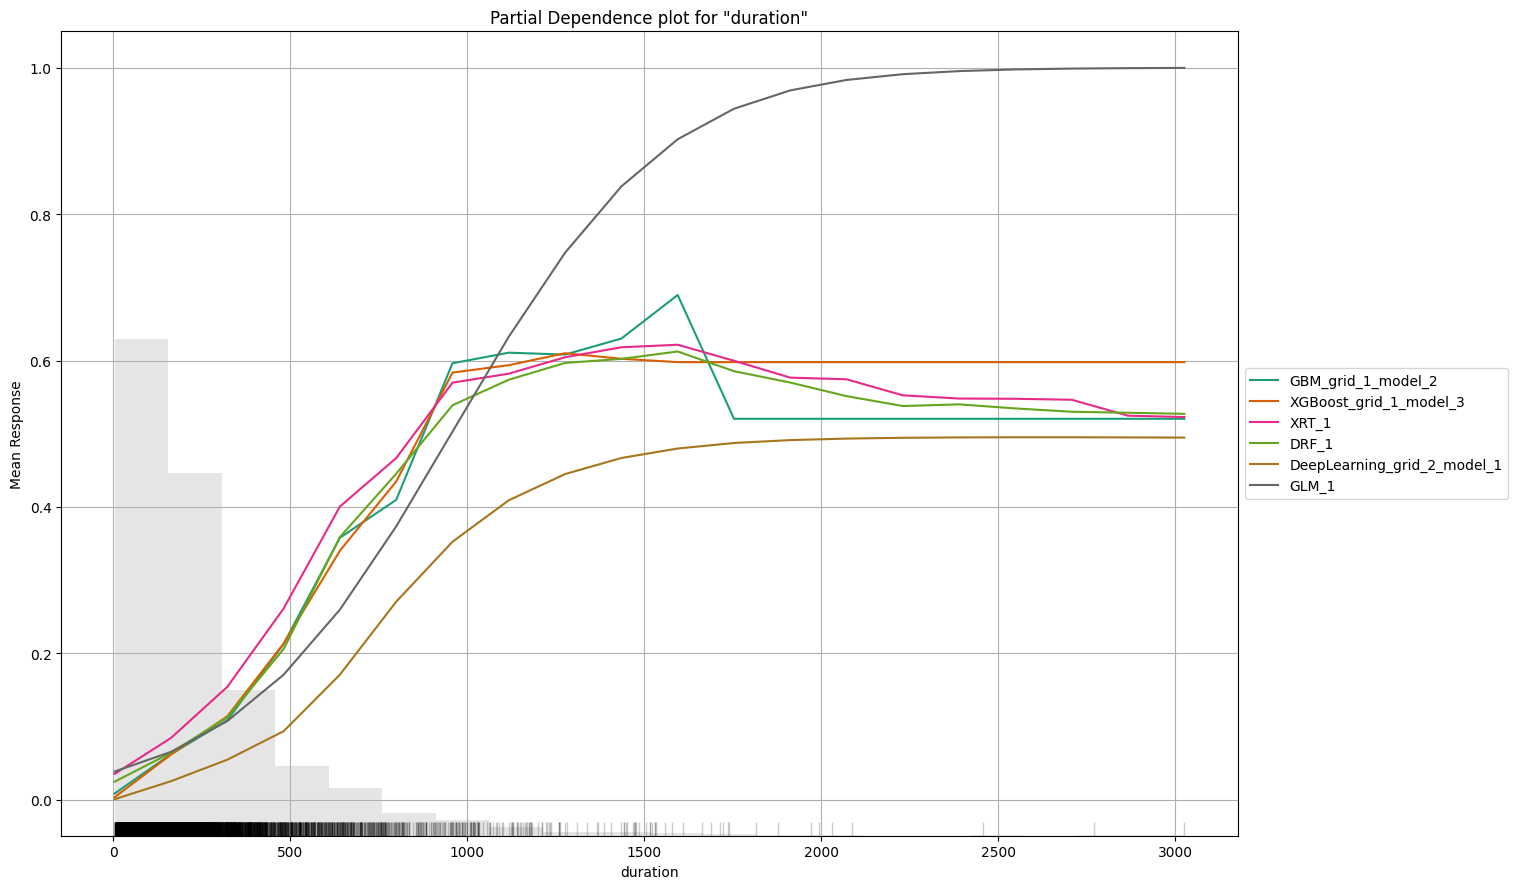

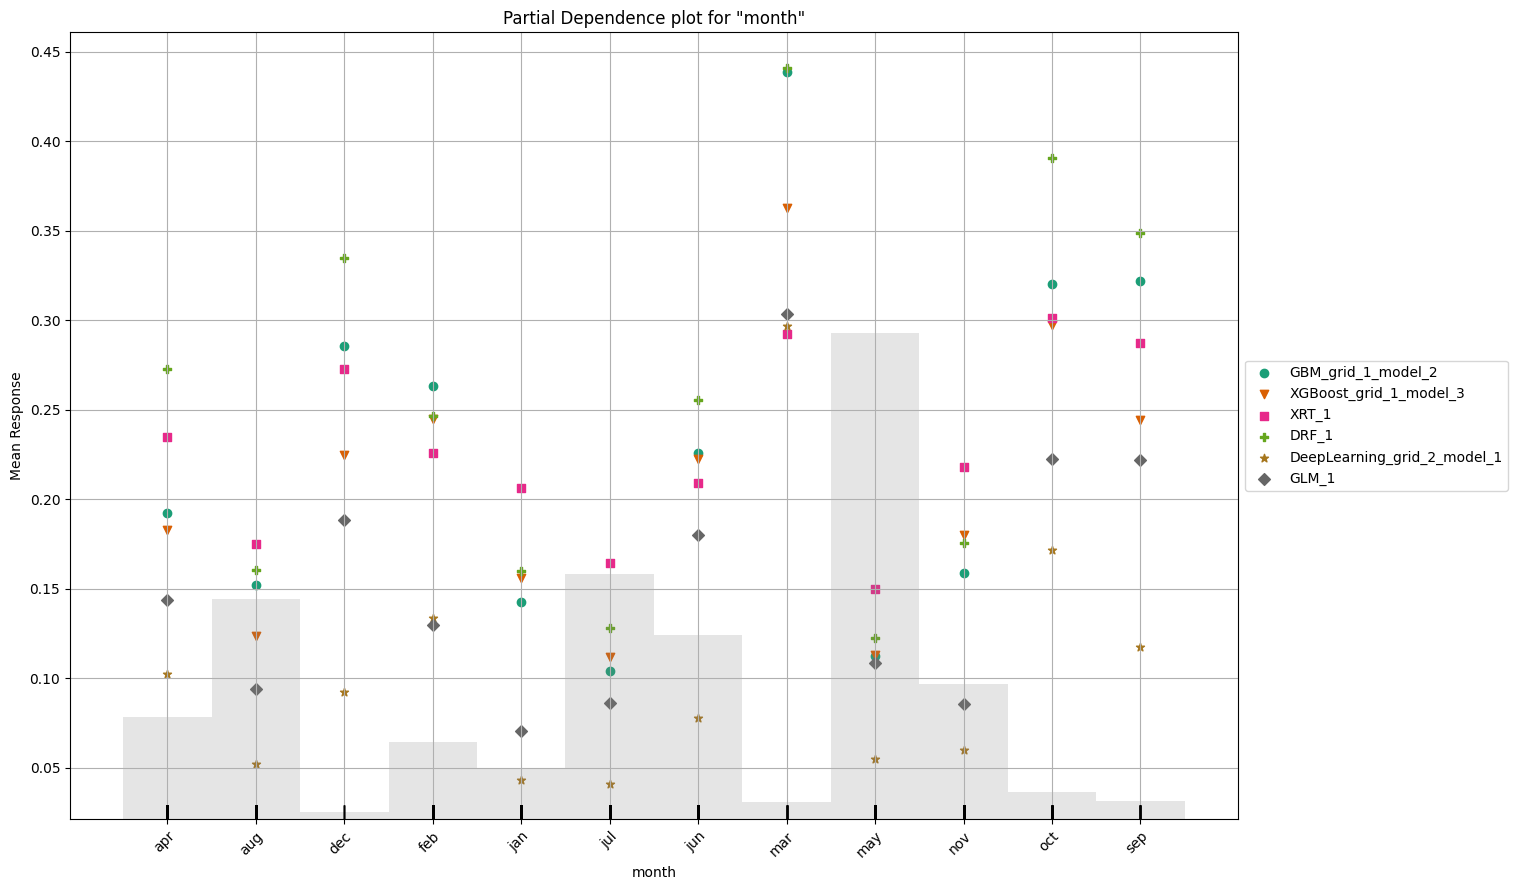

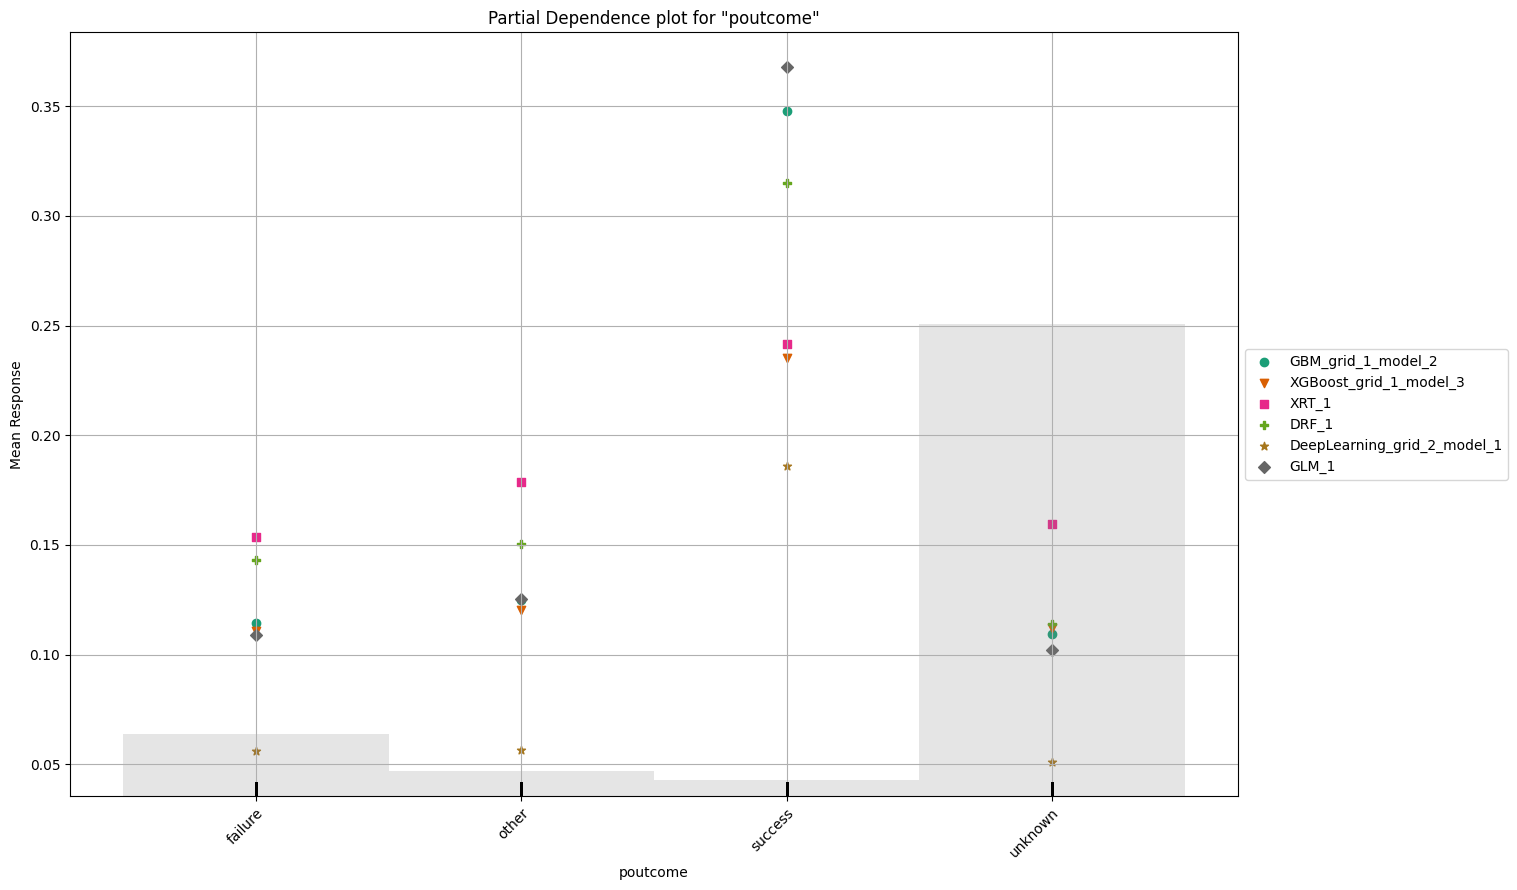

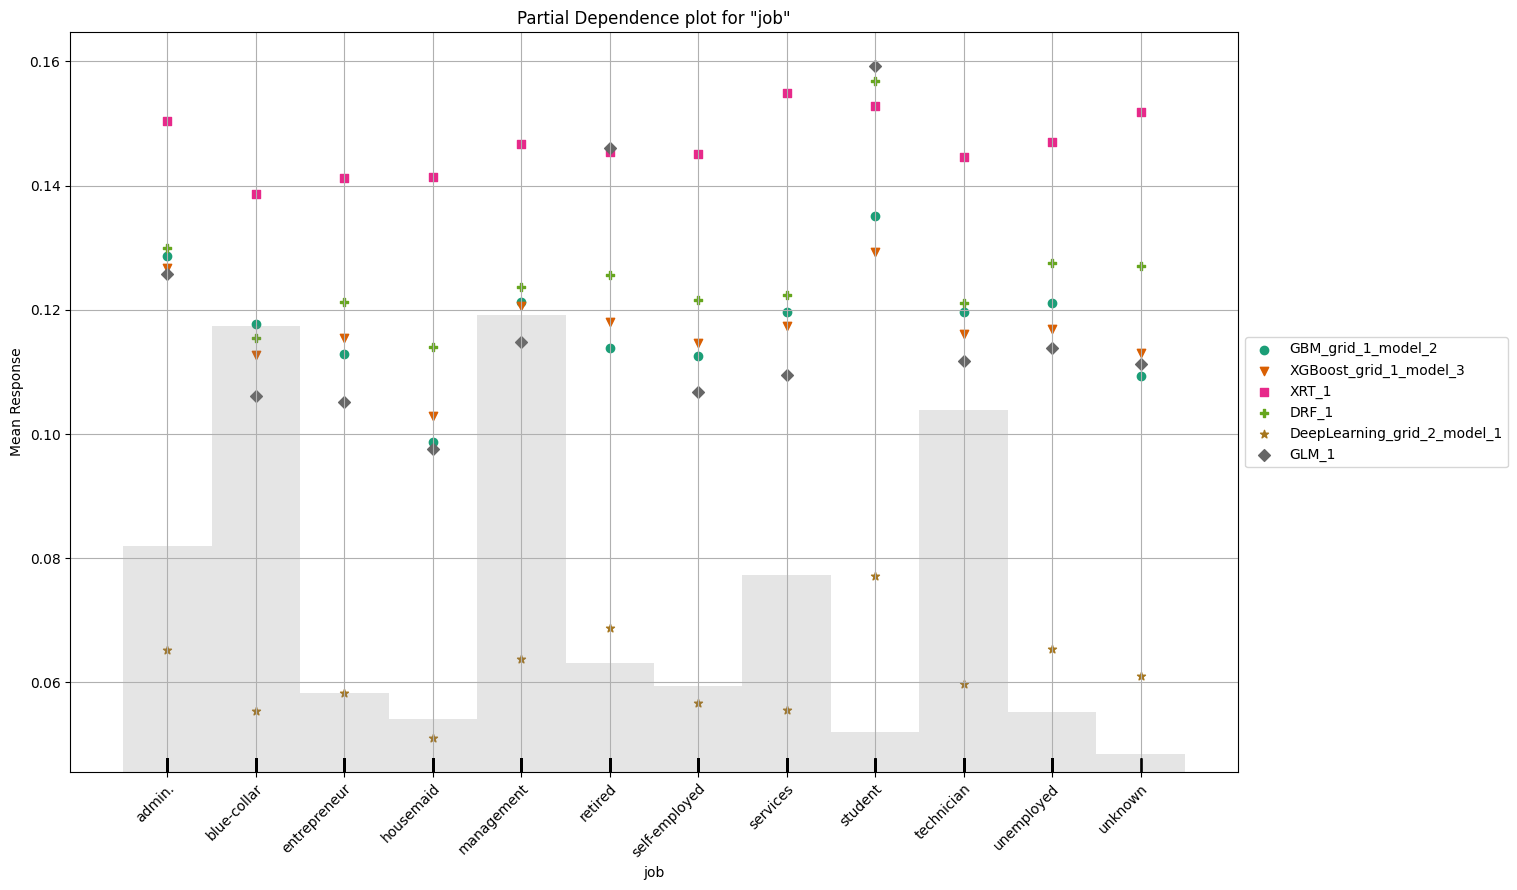

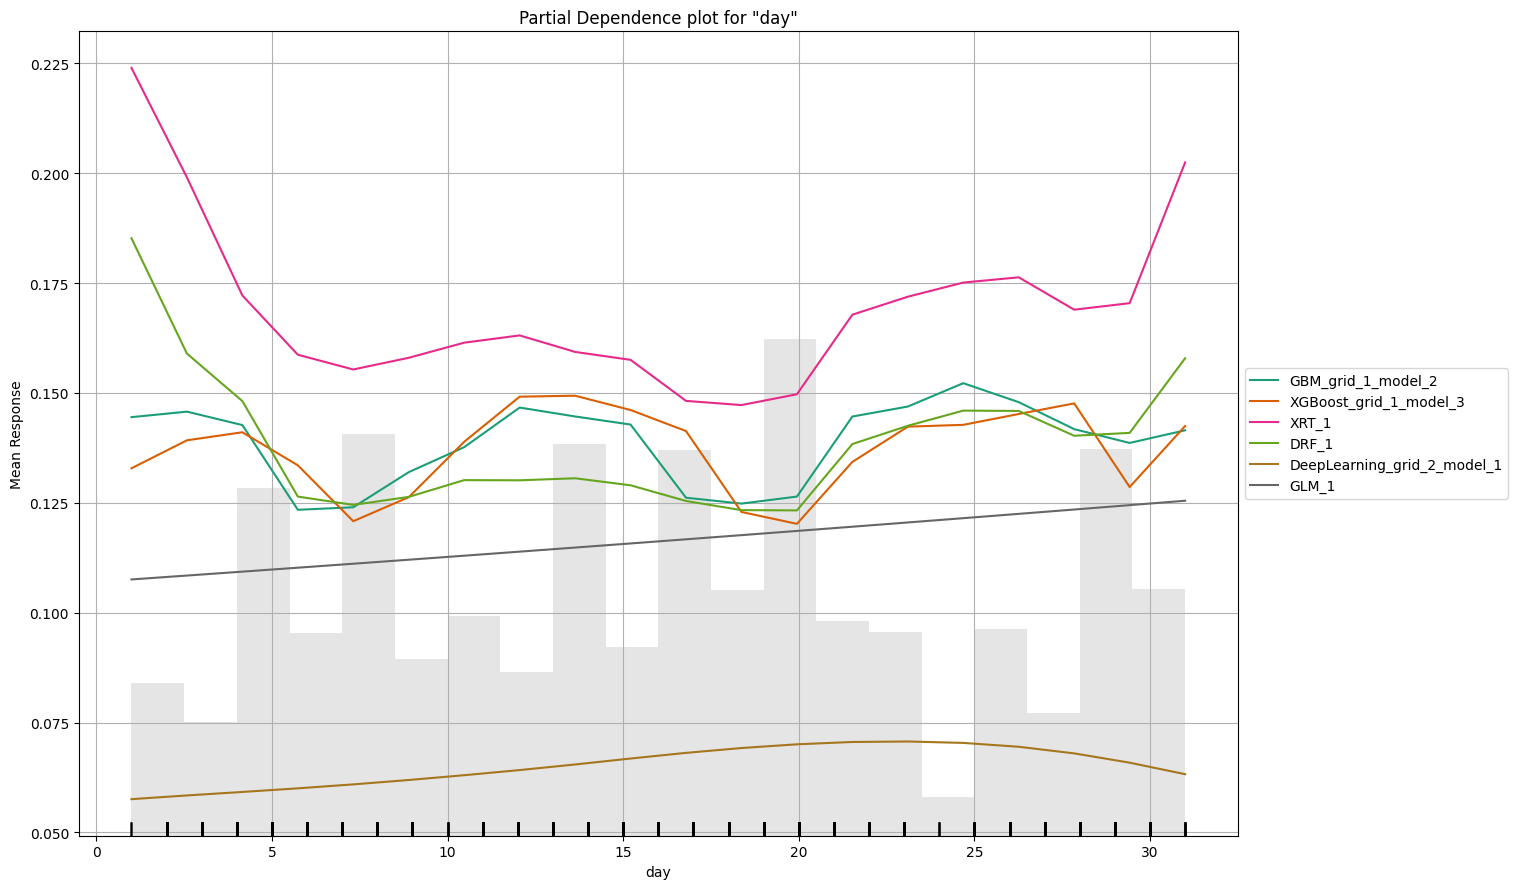



H2OExplanation([('leaderboard', H2OExplanation([('header', <h2o.explanation._explain.Header object at 0x7f9036a7fe20>), ('description', <h2o.explanation._explain.Description object at 0x7f9036a7f850>), ('data', H2OFrame({'_ex': <Expr(makeLeaderboard ['GBM_grid_1_AutoML_1_20240219_201252_model_2', 'GBM_2_AutoML_1_20240219_201252', 'GBM_3_AutoML_1_20240219_201252', 'GBM_1_AutoML_1_20240219_201252', 'XGBoost_grid_1_AutoML_1_20240219_201252_model_3', 'GBM_4_AutoML_1_20240219_201252', 'GBM_grid_1_AutoML_1_20240219_201252_model_1', 'XGBoost_3_AutoML_1_20240219_201252', 'XGBoost_grid_1_AutoML_1_20240219_201252_model_1', 'GBM_5_AutoML_1_20240219_201252', 'XGBoost_grid_1_AutoML_1_20240219_201252_model_2', 'XGBoost_2_AutoML_1_20240219_201252', 'XRT_1_AutoML_1_20240219_201252', 'DRF_1_AutoML_1_20240219_201252', 'XGBoost_1_AutoML_1_20240219_201252', 'DeepLearning_grid_2_AutoML_1_20240219_201252_model_1', 'GLM_1_AutoML_1_20240219_201252', 'DeepLearning_grid_1_AutoML_1_20240219_201252_model_1', 'D

In [10]:
from h2o import explanation
explanation = aml.explain(test_data)
print(explanation)

In [11]:
prediction = aml.leader.predict(X_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [12]:
print(prediction)

predict          no         yes
no         0.974706  0.0252937
no         0.984608  0.0153917
no         0.977179  0.022821
no         0.991115  0.00888484
no         0.996577  0.00342285
yes        0.476257  0.523743
no         0.980538  0.0194615
no         0.993995  0.00600494
no         0.998532  0.00146753
no         0.979633  0.0203668
[4521 rows x 3 columns]



In [13]:
prediction=prediction.as_data_frame()
prediction=prediction['predict'].tolist()
print(type(prediction))
print(len(prediction))

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
<class 'list'>
4521


In [14]:
y_test=test_data.as_data_frame()
y_test=y_test['y'].tolist()
print(type(y_test))
print(len(y_test))

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
<class 'list'>
4521


In [15]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction)
print(cm)

[[3741  259]
 [  97  424]]


In [16]:
from sklearn.metrics import accuracy_score, classification_report
report = classification_report(y_test,prediction)
print(report)
acc= accuracy_score(y_test,prediction)
print("Accuracy is: ",acc)

              precision    recall  f1-score   support

          no       0.97      0.94      0.95      4000
         yes       0.62      0.81      0.70       521

    accuracy                           0.92      4521
   macro avg       0.80      0.87      0.83      4521
weighted avg       0.93      0.92      0.93      4521

Accuracy is:  0.9212563592125635


As accuracy is 0.79 on data with 7:3 ratio of training set to test set, we can say that there is no over-fitting.

In [17]:
train_data = h2o.import_file('https://raw.githubusercontent.com/mana9512/bank-term-deposit-prediction/main/train.csv')

test_data = h2o.import_file('https://raw.githubusercontent.com/mana9512/bank-term-deposit-prediction/main/test.csv')


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [18]:
#converting into data frame
df_train = train_data.as_data_frame()
df_test = test_data.as_data_frame()

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [19]:
X_train.columns

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [20]:
from sklearn.preprocessing import LabelEncoder
#Encoded categorial using label encoder technique
label_encoder = LabelEncoder()
# df_train = df_train.copy()
# df_test = df_test.copy()

categorical_features = df_train.select_dtypes('object').columns
for feature in categorical_features:
  df_train[feature] = label_encoder.fit_transform(df_train[feature])


categorical_features = df_test.select_dtypes('object').columns
for feature in categorical_features:
  df_test[feature] = label_encoder.fit_transform(df_test[feature])

In [21]:
from sklearn.preprocessing import LabelEncoder
y_train_pd = df_train[['y']]
X_train_pd = df_train[X_train.columns]
X_test_pd = df_test[X_train.columns]
y_test_pd = df_test[['y']]

In [22]:
y_train_pd

,y
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [23]:
print(X_train_pd.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')


# Answer the Questions

# ***Q.1 Is the relationship significant?***

In [24]:
# P Value
# Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

#X_train = np.array(X_train, dtype=float)
dependent_var =y_train_pd['y']

independent_vars = X_train_pd[X_train_pd.columns].reset_index(drop=True)
# Fitting the OLS model
model = sm.OLS(dependent_var, independent_vars).fit()
p_values = model.summary2().tables[1]['P>|t|']
print(p_values.round(4))

age          0.5754
job          0.2878
marital      0.0000
education    0.0000
default      0.0228
balance      0.0000
housing      0.0000
loan         0.0000
contact      0.0000
day          0.0000
month        0.0000
duration     0.0000
campaign     0.0000
pdays        0.0000
previous     0.0000
poutcome     0.0000
Name: P>|t|, dtype: float64




> **Ans.** Based on the provided p-values, it is evident that the predictor variables "**age**" and "**job**" exhibit p-values greater than 0.05. Consequently, we fail to reject the null hypothesis for these variables.Conversely, the remaining predictor variables demonstrate p-values less than 0.05. This indicates that we can reject the null hypothesis, suggesting statistically significant relationship between these predictors and the response variable.



# ***Q.2 Are any model assumptions violated?***


> My database is based on Logistic Regression and hence there are a total of 6 assumptions.<br> Reference: https://www.statology.org/assumptions-of-logistic-regression/
No, none of the assumptions are violated.





#### Assumption 1: The Response Variable is Binary



After observing below cell I end up on a conclusion that the response is binary.
1. Y
2. N

In [25]:
print(train_data['y'])

y
no
no
no
no
no
no
no
no
no
no
[45211 rows x 1 column]



#### Assumption 2: The Observations are Independent

After observing sns plots, I can say that there is no collinearity between features and that they are fairly independent of each other as most data points are categorical.

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


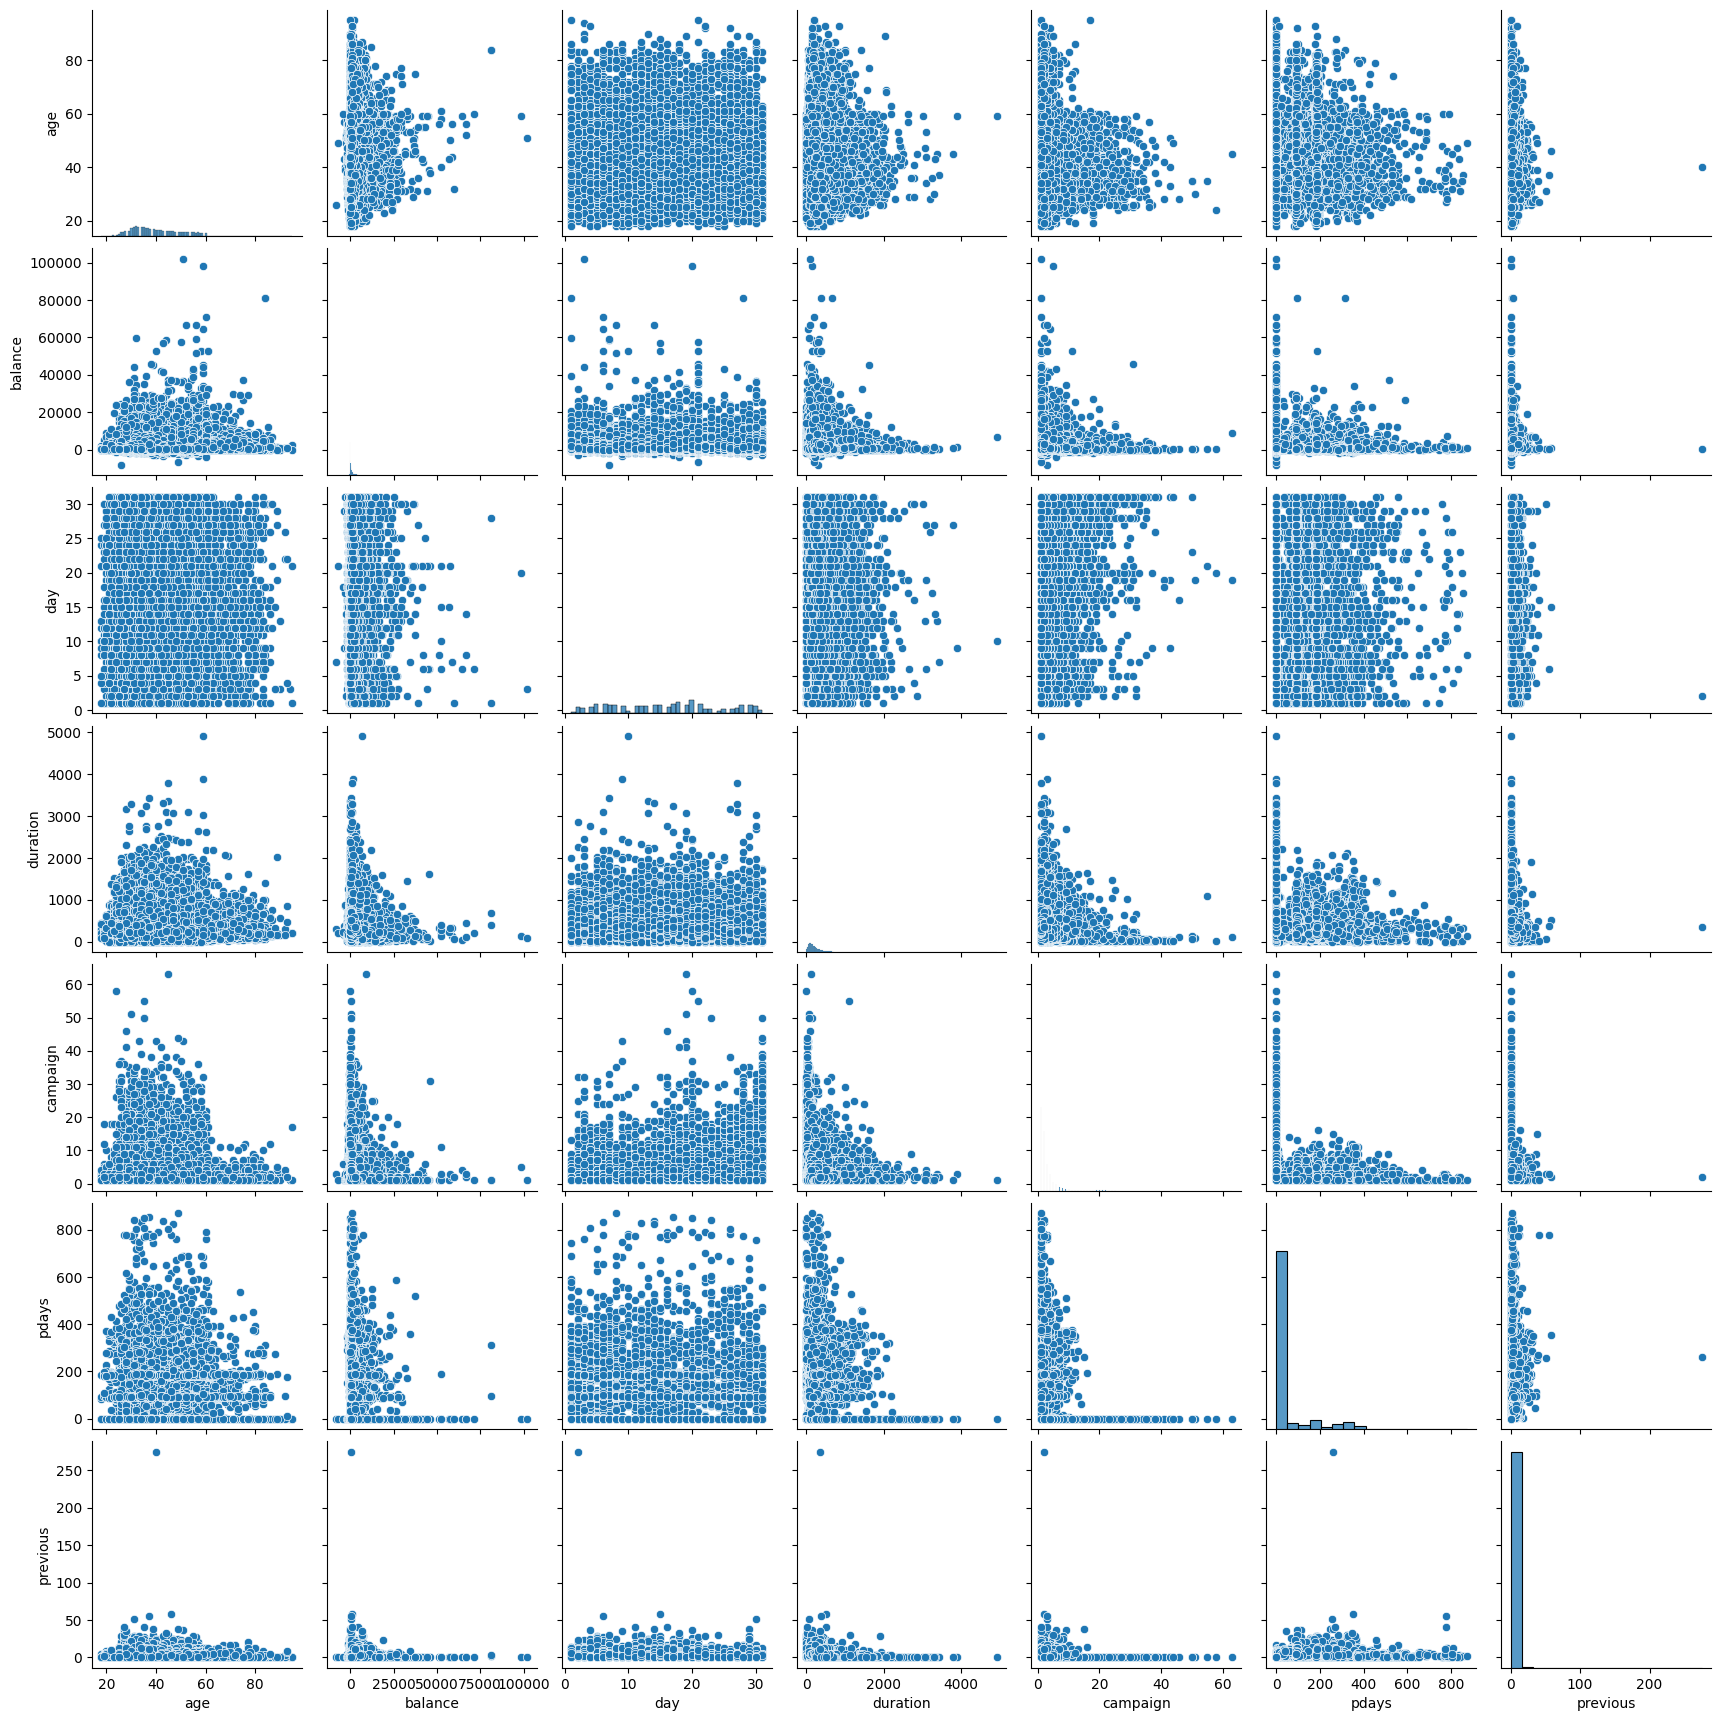

In [26]:
sns.pairplot(train_data.as_data_frame())

#### Assumption 3: There is No Multicollinearity Among Explanatory Variables

> Yes, after observing heatmap, we can say that there is less multicollinearity between variables



#### Assumption 4: There are No Extreme Outliers


> After examining the data, it can be concluded that the accuracy difference between the dataset before and after the addition of outliers is only 0.0015 percent, which is insignificant. Therefore, it can be inferred that there are no extreme outliers present



In [27]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_pd, y_train_pd)

LogisticRegression()

In [28]:
threshold = 0.5
y1_new=logisticRegr.predict(X_test_pd)
a1=logisticRegr.score(X_test_pd, y_test_pd)
print(a1)

0.8867507188675072


In [29]:
Q1 = df_train.quantile(0.05)
Q3 = df_train.quantile(0.95)

df_train_updated = df_train[~((df_train< (Q1)) |(df_train > (Q3))).any(axis=1)]

X2_train = df_train_updated[X_train.columns]
y2_train = df_train_updated[['y']]

# X2_train_data, X2_test_data, y2_train_data, y2_test_data = train_test_split(X2, y2, test_size=0.2,)
logisticRegr.fit(X2_train, y2_train)

LogisticRegression()

In [30]:
threshold = 0.5
logisticRegr.fit(X_test_pd, y_test_pd)

logisticRegr.predict(X_test_pd)
a2=logisticRegr.score(X_test_pd, y_test_pd)
print(a2)

0.8882990488829905


In [31]:
print(f"Difference in accuracy {a2-a1}")

Difference in accuracy 0.001548330015483268


#### Assumption 5: There is a Linear Relationship Between Explanatory Variables and the Logit of the Response Variable


The p-values only indicate the statistical significance of the relationships between each individual predictor variable and the response variable, but they do not provide information on the nature or form of these relationships.

To determine whether there is a linear relationship between the explanatory variables and the logit of the response variable, we would need to perform further analysis, such as examining scatterplots or fitting a logistic regression model and assessing the linearity assumptions using diagnostic plots.

Optimization terminated successfully.
         Current function value: 0.267322
         Iterations 8


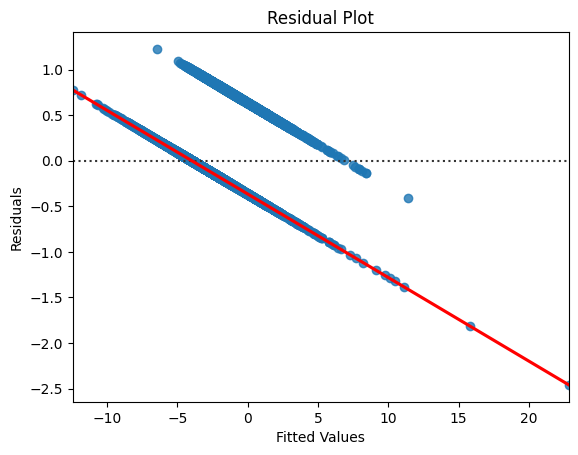

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

X = sm.add_constant(X_train_pd[X_train_pd.columns])
y = y_train_pd['y']
model = sm.Logit(y, X).fit()

# #Check the linearity assumptions using diagnostic plots
sns.residplot(x=model.fittedvalues, y=y, lowess=True, line_kws={"color":"red"})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

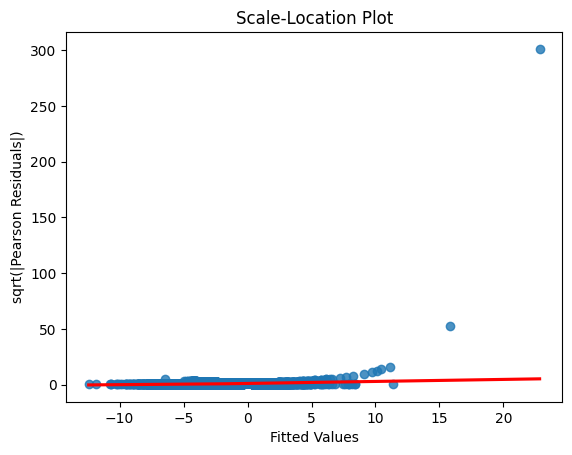

In [33]:
sns.regplot(x=model.fittedvalues, y=np.sqrt(np.abs(model.resid_pearson)), lowess=True, line_kws={"color":"red"})
plt.xlabel("Fitted Values")
plt.ylabel("sqrt(|Pearson Residuals|)")
plt.title("Scale-Location Plot")
plt.show()

In both plots, we see random scatter of residuals around zero with no obvious patterns or trends. Hence, There is a Linear Relationship Between Explanatory Variables and the Logit of the Response Variable

#### Assumption 6: The Sample Size is Sufficiently Large

> The training dataset has 45211 rows and 16 columns hence the dataset is sufficiently large

In [34]:
print(X_train_pd.shape)

(45211, 16)


In [35]:
print(X_test_pd.shape)

(4521, 16)



# ***Q.3 Is there any multicollinearity in the model?***

> Yes, after observing following heatmap, we can say that there is some multicollinearity between variables.



<Axes: >

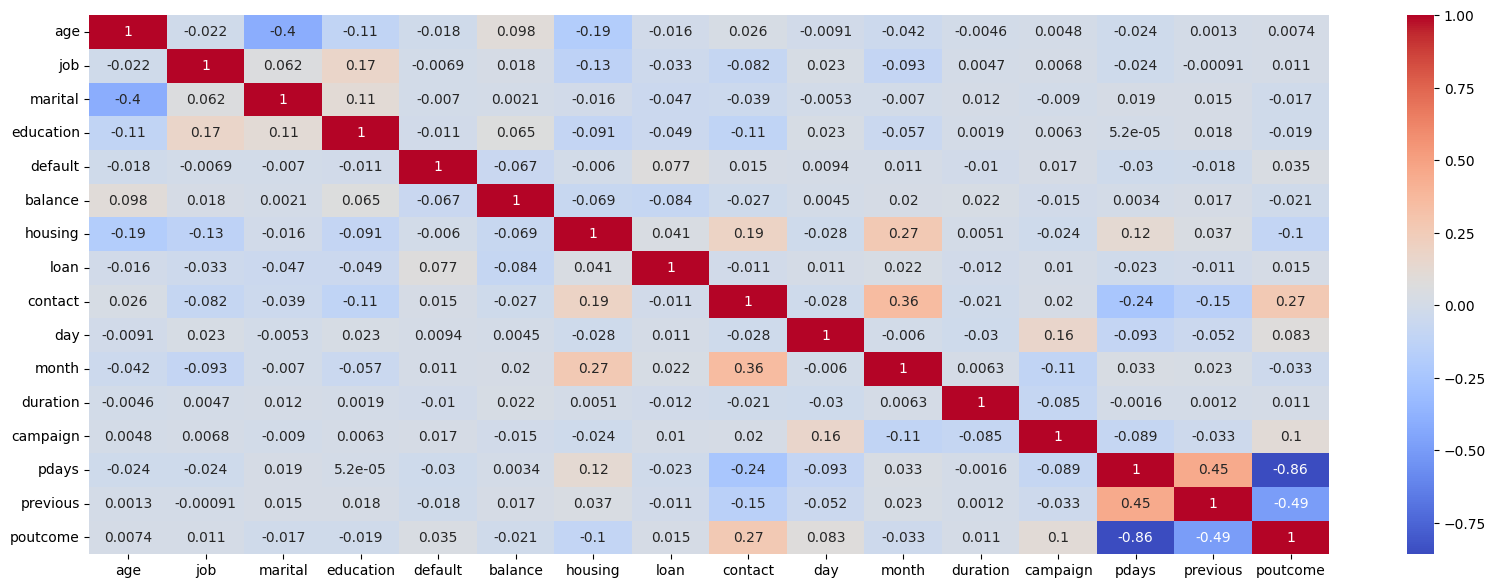

In [36]:
#the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(X_train_pd.corr(), annot=True, cmap='coolwarm')

# ***Q.4 In the multivariate models are predictor variables independent of all the other predictor variables?***

> Yes, after observing the sns pairplot and Q-Q plot, we can see that the there is collinearity between features



Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object') 16


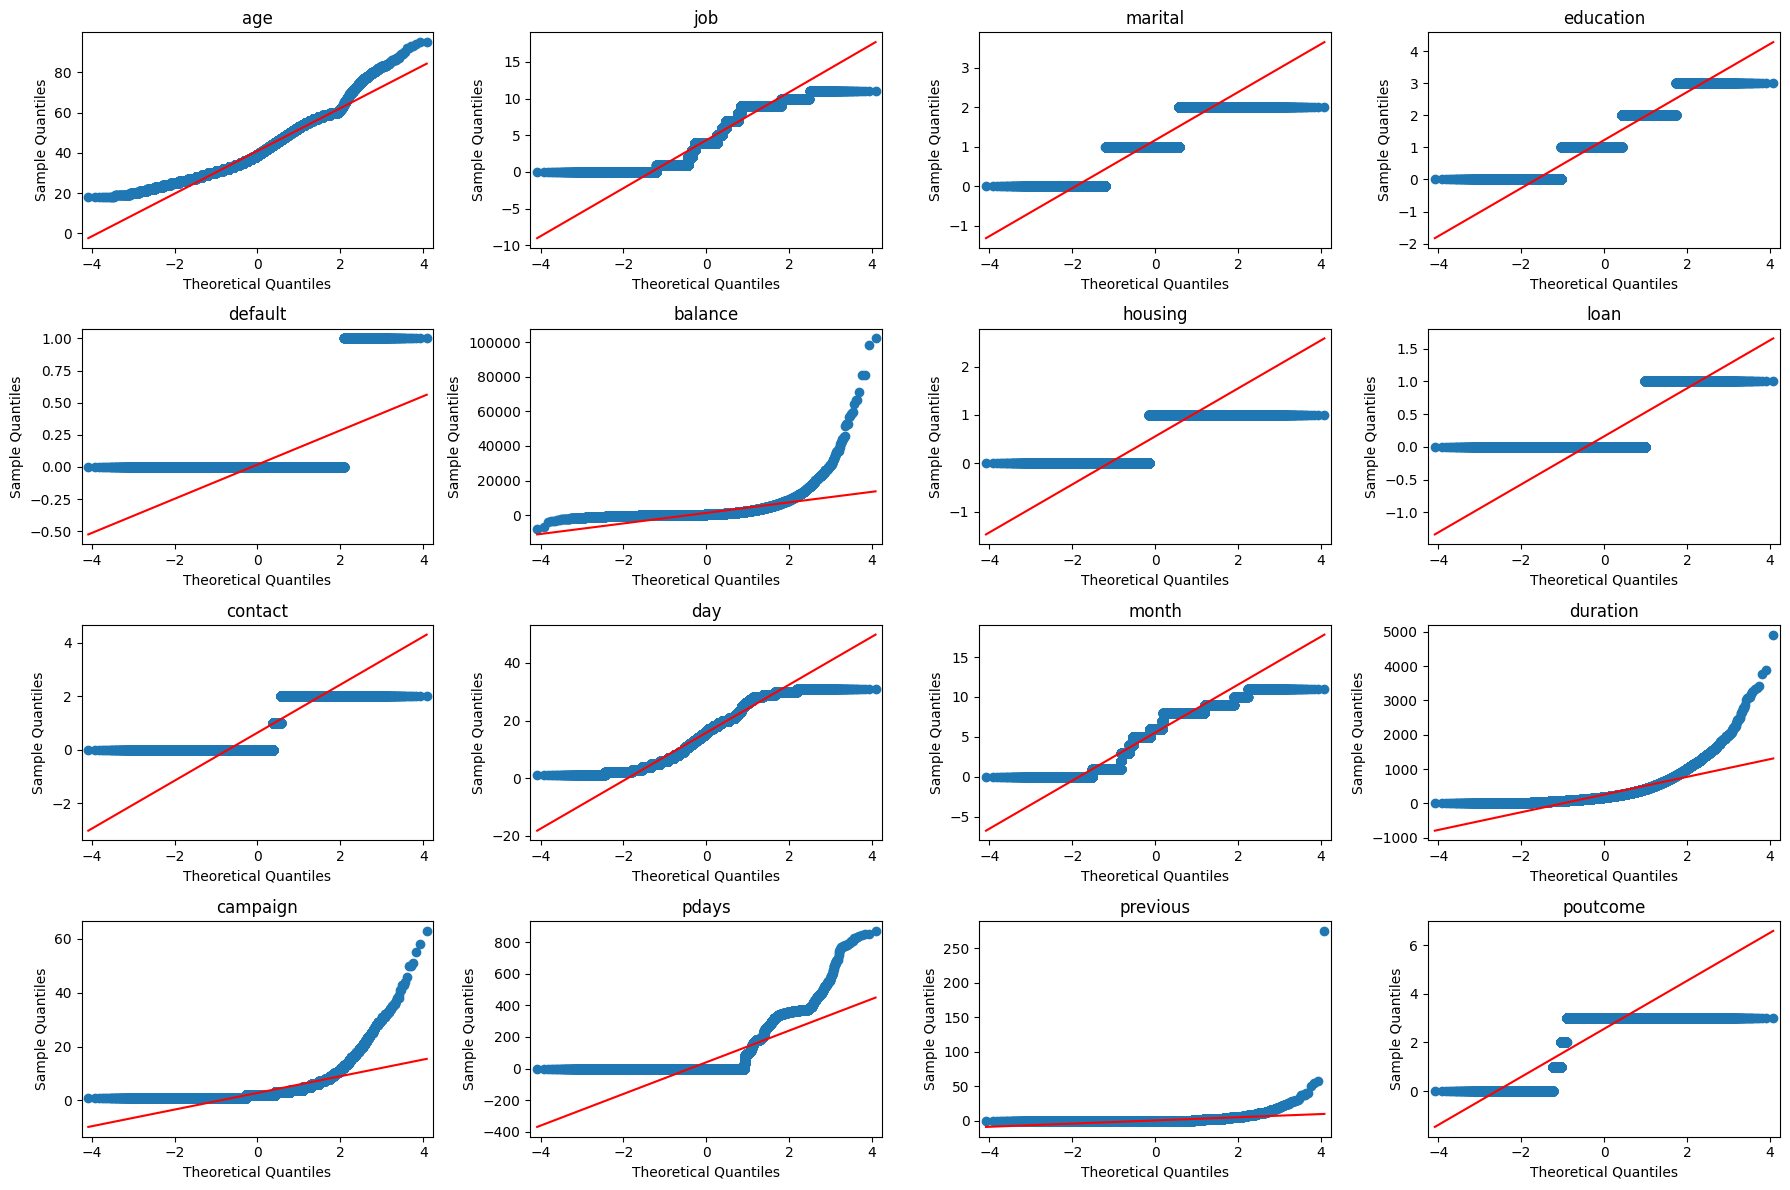

In [37]:
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm

import seaborn as sns

numeric_features = X_train_pd.select_dtypes('int64').columns
print(numeric_features, len(numeric_features))
fig, axes = plt.subplots(4, 4, figsize=(18, 12))
axes = axes.flatten()

# Plot Q-Q plot for each numeric feature in the grid
for i, numeric_feature in enumerate(numeric_features):
  sm.qqplot(X_train_pd[numeric_feature], line='s', ax=axes[i])
  axes[i].set_title(numeric_feature)

# Adjust layout
plt.tight_layout()
plt.show()


# ***Q.5 In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.***

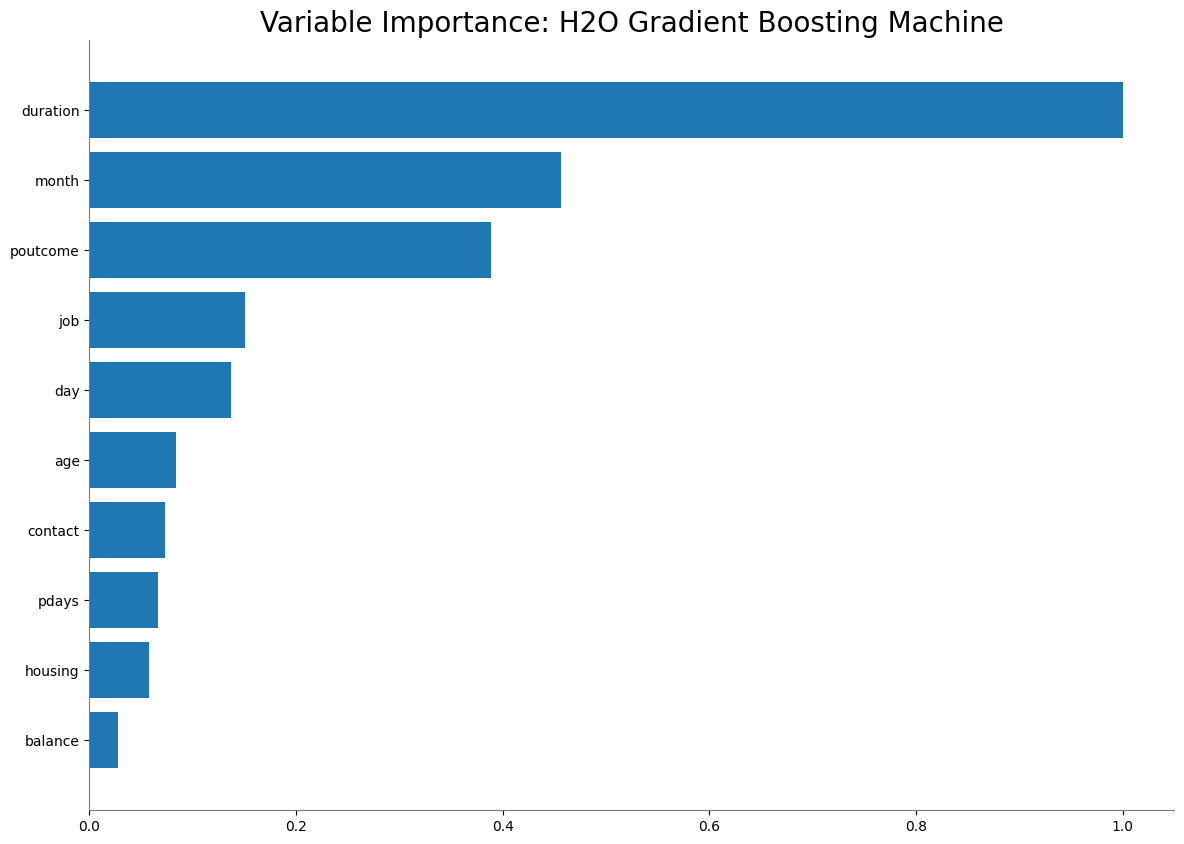

<Figure size 640x480 with 0 Axes>

In [38]:
%matplotlib inline
best_model.varimp_plot()

The varimp.plot function typically generates a bar chart that arranges the input variables based on their importance scores. A higher importance score indicates a greater significance of the variable for the model.

Upon examining the bar chart above, we can deduce that "balance" emerges as the most critical feature, while "housing" appears to be the least significant. The hierarchy of importance is as follows:

1. duration
2. month
3. poutcome
4. job
5. day
6. age
7. contact
8. pdays
9. housing
10. balance

In this ranking, "duration" stands out as the most vital feature with a value of 1. Subsequently, "month" ranks as the second most important feature with a value of 0.5, indicating that "duration" holds 100% importance, whereas "month" carries 40% significance.






# ***Q.6 Does the model make sense?***


> Based on the feature importance ranking of the model, the most important feature for predicting whether a customer will opt for a bank term deposit is "duration".

> This ranking suggests that the duration of interaction during the marketing campaign is the most critical factor for determining whether a customer will opt for a bank term deposit. This aligns with marketing practices, as longer interaction durations often indicate a higher level of interest and engagement from the customer.

> The fact that "month" and "poutcome" also have relatively high importance scores suggests that these factors may also play significant roles in determining customer decisions. Specifically, the month in which the marketing campaign takes place and the outcome of the previous marketing efforts appear to influence customer behavior regarding term deposits.

> On the other hand, the lower importance score of "balance" suggests that the balance of the customer's account is considered less influential in their decision to opt for a bank term deposit. This implies that customers with varying account balances may still be equally likely to consider a term deposit.

> Overall, the feature importance analysis indicates that "duration", "month", and "poutcome" are the most influential factors in predicting customer decisions regarding bank term deposits, while "balance" plays a relatively lesser role in comparison.



In [39]:
print(aml.leader)
r2 = aml.leader.r2(valid=True)
print("*"*10)
print(f"r2 value is {r2}")

Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20240219_201252_model_2


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    100                100                         84263                  9            9            9             19            116           62.1

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.045889597295384124
RMSE: 0.2142185736470676
LogLoss: 0.15149763086203188
Mean Per-Class Error: 0.12919973421845765
AUC: 0.9655416595617643
AUCPR: 0.8020549427037642
Gini: 0.9310833191235286

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3549120928072559
       no     yes    Error    Rate
-----  -----  -----  -------  ------

# ***Q.7 Does regularization help?***

In [40]:
from h2o.estimators import H2OGeneralizedLinearEstimator

# Specify predictor columns and response column
predictors = train_data.columns[:-1]  # Assuming the last column is the response column
response = train_data.columns[-1]
# Initialize and train the logistic regression model
lr_model = H2OGeneralizedLinearEstimator(family="binomial")
lr_model.train(x=predictors, y=response, training_frame=train_data)

# Train accuracy
train_predictions = lr_model.predict(train_data)
train_predictions_df = train_predictions.as_data_frame()
train_data_df = train_data.as_data_frame()
train_actual_labels = train_data_df.iloc[:, -1]
train_correct_predictions = sum(train_predictions_df['predict'] == train_actual_labels)
train_total_predictions = len(train_predictions_df)
train_accuracy = train_correct_predictions / train_total_predictions

# Test accuracy
test_predictions = lr_model.predict(test_data)
test_predictions_df = test_predictions.as_data_frame()
test_data_df = test_data.as_data_frame()
test_actual_labels = test_data_df.iloc[:, -1]
test_correct_predictions = sum(test_predictions_df['predict'] == test_actual_labels)
test_total_predictions = len(test_predictions_df)
test_accuracy = test_correct_predictions / test_total_predictions

# Difference in accuracies
accuracy_difference = train_accuracy - test_accuracy
print("Difference in accuracies:", accuracy_difference)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Difference in accuracies: 0.0017277340848714795


There is a near-zero difference between the training and test accuracy, it suggests that the model is not overfitting the training data, which suggests no need for ***regularization***.

# ***Q.8 Which independent variables are significant?***

In [41]:
train_data = h2o.import_file('https://raw.githubusercontent.com/mana9512/bank-term-deposit-prediction/main/train.csv')
train_data.head()

test_data = h2o.import_file('https://raw.githubusercontent.com/mana9512/bank-term-deposit-prediction/main/test.csv')
test_data.head()


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


Refer question 1 for p-values.

In [42]:
X_train_pd.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3


In [43]:
from sklearn import preprocessing

X_train_scaled = X_train_pd
X_test_scaled = X_test_pd
min_max_scaler = preprocessing.MinMaxScaler()
X_train_columns = list(X_train_pd.columns)
X_test_columns = list(X_test_pd.columns)
# # Run the normalizer on the dataframe
X_train_scaled[X_train_columns] = min_max_scaler.fit_transform(X_train_pd[X_train_columns])
X_test_scaled[X_test_columns]= pd.DataFrame(min_max_scaler.fit_transform(X_test_pd[X_test_columns]))

In [44]:
print(X_train_pd.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')


In [45]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=5)
independent_vars = X_train_scaled[list(X_train_scaled.columns)]
# print(independent_vars)
dependent_var = y_train_pd
print(dependent_var)

fit = selector.fit(independent_vars, dependent_var)

mask = fit.get_support()

selected_features = X_train_pd[X_train_pd.columns].columns[mask]

print("Selected Features:", selected_features)

       y
0      0
1      0
2      0
3      0
4      0
...   ..
45206  1
45207  1
45208  1
45209  0
45210  0

[45211 rows x 1 columns]
Selected Features: Index(['housing', 'loan', 'contact', 'duration', 'pdays'], dtype='object')


By SelectKBest we see that the 5 most significant indipendent variables are:

1. housing
2. loan
3. contact
4. duration
5. pdays

# ***Q.9 Which hyperparameters are important?***

In [46]:
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [47]:
y = 'y'
X = train_data.drop(y)
X = X.columns

In [48]:
print(X)
print(y)

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']
y


*learn_rate*, *max_depth*, and *sample_rate* are hyperparameters commonly used in gradient boosting algorithms for machine learning, such as XGBoost and LightGBM.

**Learning Rate**: Controls the step size during each boosting iteration. A smaller learning rate can help prevent overfitting by slowing down the learning process and allowing the model to generalize better to new data. However, a smaller learning rate also means that it takes longer for the model to converge to an optimal solution.

**Maximum Depth**: The maximum depth of each decision tree in the ensemble. A deeper tree can capture more complex interactions between features, but can also lead to overfitting. Setting a smaller max_depth can help prevent overfitting, but may result in less expressive models.

**Sample Rate**: The fraction of training examples used for each boosting iteration. A smaller sample_rate can introduce more randomness into the model, which can help prevent overfitting and improve generalization performance. However, a smaller sample_rate also means that each boosting iteration is based on less information, which can make the learning process less stable.

In [49]:
# define hyperparameter space
hyper_params = {
    'learn_rate': [0.02, 0.03, 0.04, 0.05],
    'max_depth': [3, 5, 7],
    'sample_rate': [0.5, 0.6, 0.7, 0.8, 0.9]
}

# initialize model
model = H2OGradientBoostingEstimator()

# create grid search object
grid = H2OGridSearch(model, hyper_params,
                     grid_id='gbm_grid',
                     search_criteria={'strategy': "RandomDiscrete", 'max_models': 20})

# train grid search
grid.train(x=X,
           y=y,
           training_frame=train_data,
           nfolds=5)

# select the best model
best_model = grid.get_grid()[0]

# print the best hyperparameters
print(best_model.params)



gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'gbm_grid_model_16', 'type': 'Key<Model>', 'URL': '/3/Models/gbm_grid_model_16'}, 'input': None}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'train2.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/train2.hex'}, 'input': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'train2.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/train2.hex'}}, 'validation_frame': {'default': None, 'actual': None, 'input': None}, 'nfolds': {'default': 0, 'actual': 5, 'input': 5}, 'keep_cross_validation_models': {'default': True, 'actual': True, 'input': True}, 'keep_cross_validation_predictions': {'default': False, 'actual': False

In [50]:
gbm_gridperf2 = grid.get_grid(decreasing=False)
print(gbm_gridperf2)

Hyper-Parameter Search Summary: ordered by increasing logloss
    learn_rate    max_depth    sample_rate    model_ids          logloss
--  ------------  -----------  -------------  -----------------  ---------
    0.05          7            0.7            gbm_grid_model_16  0.209336
    0.04          7            0.7            gbm_grid_model_17  0.215322
    0.04          7            0.8            gbm_grid_model_3   0.215535
    0.04          7            0.5            gbm_grid_model_4   0.216168
    0.05          5            0.9            gbm_grid_model_18  0.217656
    0.05          5            0.6            gbm_grid_model_1   0.217775
    0.05          5            0.7            gbm_grid_model_5   0.218052
    0.04          5            0.7            gbm_grid_model_14  0.224203
    0.04          5            0.9            gbm_grid_model_15  0.224256
    0.03          7            0.9            gbm_grid_model_9   0.224911
    0.03          7            0.7            gbm_

In [51]:
list_hyperparameters = []
for i in range(len(gbm_gridperf2)):
    hyperparameters = gbm_gridperf2.get_hyperparams_dict(i)
    list_hyperparameters.append(hyperparameters)

Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate]
Hyperparameters: [learn_rate

In [52]:
models = gbm_gridperf2.models

In [53]:
list_accuracy = []
list_logloss = []

for model in models:
    predictions = model.predict(test_data)
    performance_metrics = model.model_performance(test_data)
    accuracy = performance_metrics.accuracy()
    log_loss = performance_metrics.logloss()
    list_accuracy.append(accuracy)
    list_logloss.append(log_loss)


gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |████████████████████████

In [54]:
for i in range(len(gbm_gridperf2)):
    list_hyperparameters[i]["logloss"] = list_logloss[i]
    list_hyperparameters[i]["accuracy"] = list_accuracy[i]

In [55]:
hyperparameters_dataframe = pd.DataFrame(list_hyperparameters)
hyperparameters_dataframe.head()

,learn_rate,max_depth,sample_rate,logloss,accuracy
0,0.05,7,0.7,0.187506,"[[0.47455196992355897, 0.931431099314311]]"
1,0.04,7,0.7,0.196695,"[[0.5069022340408459, 0.9274496792744968]]"
2,0.04,7,0.8,0.196464,"[[0.4555355737816354, 0.9289980092899801]]"
3,0.04,7,0.5,0.197982,"[[0.44267340454830345, 0.9274496792744968]]"
4,0.05,5,0.9,0.210277,"[[0.45468023772796834, 0.9170537491705375]]"


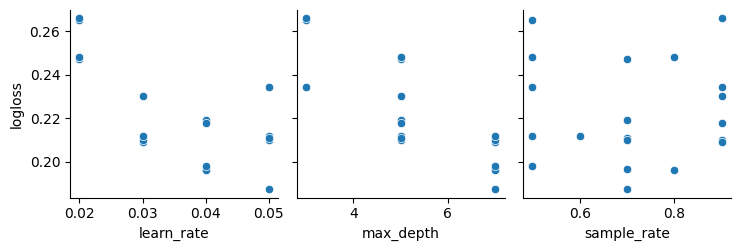

In [56]:
sns.pairplot(
    hyperparameters_dataframe,
    y_vars=["logloss"],
    x_vars=["learn_rate", "max_depth", "sample_rate"],
)

In [57]:
print("**Hyperparameters Tunning Analysis**")
hyperparameters_dataframe.head(1)

**Hyperparameters Tunning Analysis**


,learn_rate,max_depth,sample_rate,logloss,accuracy
0,0.05,7,0.7,0.187506,"[[0.47455196992355897, 0.931431099314311]]"


After running a range of values for hyper parameters the best suited combination found to be ***learning_rate*** with a value of **0.1**, ***max_depth*** with a value of *7* and ***sample_rate*** with a value of **0.9**

**NOTE**: A lower log loss value indicates better performance of the model.

# ***Q.10 Coding Professionalism?***
Yes, I take full ownership of my code.



# ***Conclusion***

I familiarized myself with H2O AutoML, an effective tool for constructing precise predictive models devoid of manual hyperparameter adjustment. H2O AutoML exhibits versatility in handling various supervised learning tasks, encompassing classification and regression, and adeptly manages both numerical and categorical data types. Leveraging H2O AutoML, I crafted a predictive model geared towards determining individuals' inclination towards bank term deposits based on select attributes.

Furthermore, I delved into the concept of variable importance within the model. Additionally, I investigated and implemented the impact of Ridge and LASSO regularization techniques on enhancing the model's efficacy.Lastly, I engaged in hyperparameter tuning utilizing the Random Grid Search approach to fine-tune the model's hyperparameters, aiming for enhanced performance.

# References

H2O AutoML:
* https://www.h2o.ai/products/h2o-automl/

Variable importance in H2O AutoML:
* https://www.kaggle.com/c/house-prices-advanced-regression-techniques/discussion/28155#latest-161221

Hyperparameter tuning with Random Grid Search:
* https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/


Ridge and LASSO regularization:
* https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b
* https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification

# Licensing

MIT License

Copyright (c) 2024 mana9512

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.